### Lead Scoring Assignment
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%

## Goals:
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. 

In [1]:
# warnings
import warnings
warnings.filterwarnings('ignore')

#python
import pandas as pd
import numpy as np

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Model 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

### Step 1 - Read and understand data

In [2]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
print(leads.shape)
leads.describe()

(9240, 37)


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
cat_cols = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
for i in cat_cols:
    print(i)
    print(leads[i].value_counts(normalize=True)*100)
    print(' ')
    
#Inference: There are few columns with just one unique values which can be dropped.
#           There are few columns with select as value which needs to be replaced    

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
 
Lead Source
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
Pay per Click Ads     0.010865
NC_EDM                0.010865
WeLearn               0.010865
blog                  0.010865
welearnblog_Home      0.010865
testone               0.010865
youtubechannel        0.010865
Name: Lead Source, dtype: float64
 
Do Not Email
No     92.056277
Yes     7.943723
Name: Do Not Email, d

In [7]:
# Replacing the value 'Select' with null values 

leads = leads.replace('Select',np.nan)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Dropping the columns with just one unique values 
cols_to_drop = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

leads.drop(cols_to_drop,axis=1,inplace=True)

In [10]:
# check for nulls
(leads.isnull().sum()/leads.shape[0])*100


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# dropping the columns with missing values greater than or equal to 40% .
cols_to_drop  = leads.columns[leads.isnull().mean()*100>40]
leads.drop(cols_to_drop,axis = 1,inplace=True)

In [12]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
# Drop the prospect ID as its unique column which will not help in prediction
leads.drop(['Prospect ID'],axis=1,inplace=True)

In [14]:
# Conversion rate for the current data

print('Current Conversion rate ',(sum(leads['Converted'])/leads.shape[0])*100)


Current Conversion rate  38.53896103896104


In [15]:
# check for nulls
(leads.isnull().sum()/leads.shape[0])*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [16]:
# Check for distinct values for columns where nulls are more than 25%
null_cols = leads.columns[(leads.isnull().sum()/leads.shape[0])*100 > 25]
for i in null_cols:
    print(leads[i].value_counts(normalize=True))
    print(' ')

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Canada                  0.000590
Nigeria                 0.000590
Germany                 0.000590
South Africa            0.000590
Kuwait                  0.000590
Sweden                  0.000443
Belgium                 0.000295
Ghana                   0.000295
Asia/Pacific Region     0.000295
Netherlands             0.000295
Italy                   0.000295
Philippines             0.000295
Uganda                  0.000295
China                   0.000295
Bangladesh              0.000295
Kenya                   0.000148
Malaysia                0.000148
Sri Lanka 

In [17]:
# Replacing the null values with mode of the column as these are categorical columns
for i in null_cols:
    leads[i].fillna(leads[i].mode()[0],axis=0,inplace=True)

In [18]:
# check for nulls
round((leads.isnull().sum()/leads.shape[0])*100,2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

Inference: Rest missing values are under 2% so we can drop these rows.

In [19]:
# Dropping the rows with null values
leads.dropna(inplace = True)

In [20]:
leads.shape

(9074, 24)

In [21]:
# Percentage of rows retained 
(len(leads.index)/9240)*100

98.2034632034632

### Step 2: Exploratory Data Analysis

In [22]:
# Check for duplicates
leads[leads.duplicated()].shape

(0, 24)

### Univariate and Bivariate Analysis

### Converted

Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [23]:
print('Conversion Rate is ',(sum(leads['Converted'])/leads.shape[0])*100)

# Inference: The lead conversion rate is 38%.

Conversion Rate is  37.85541106458012


In [24]:
cols = [ 'Lead Origin', 'Lead Source', 'Do Not Email','Do Not Call','Last Activity','Tags','Country','Search',
        'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
        'City','A free copy of Mastering The Interview']
len(cols)

15

In [25]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

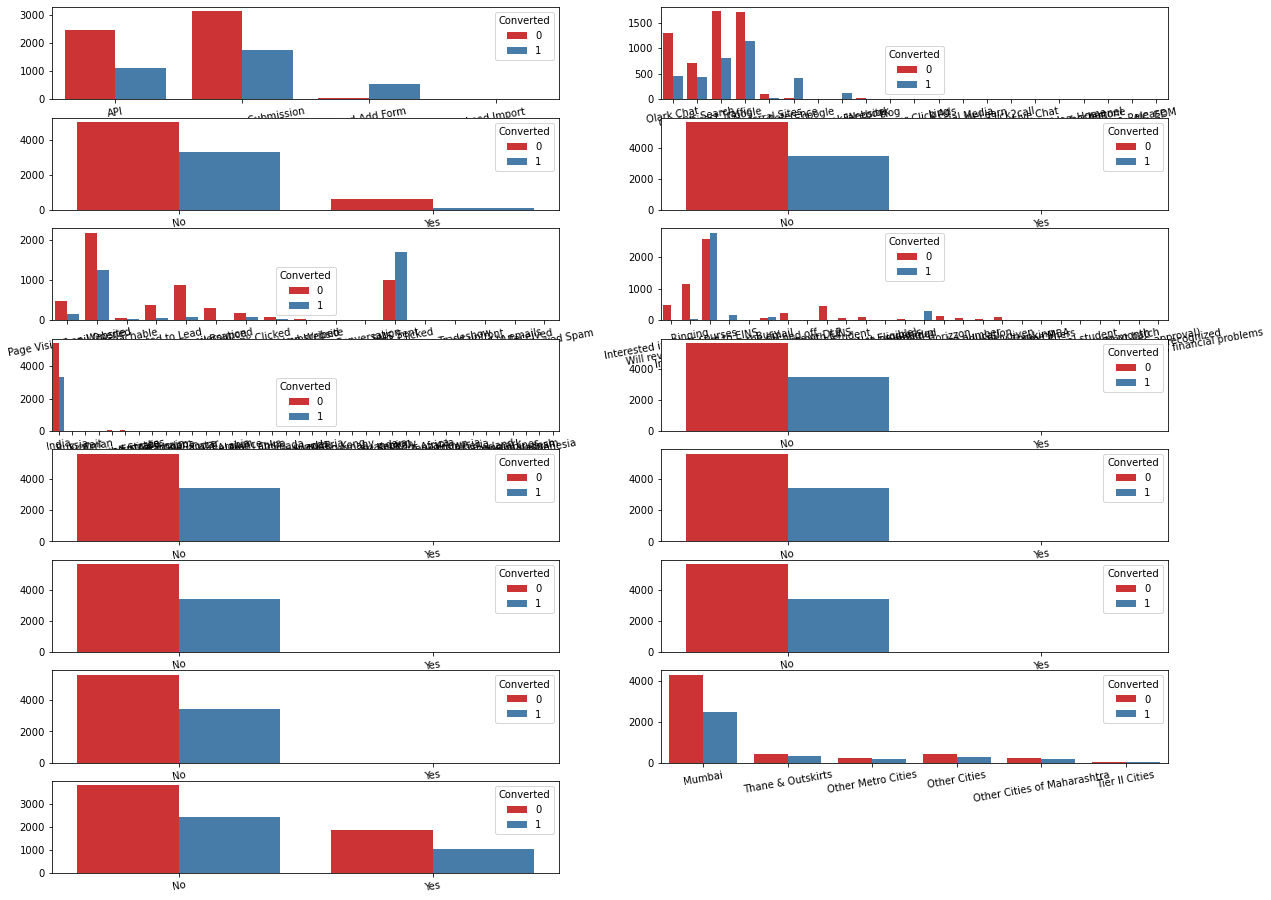

In [26]:
cols = [ 'Lead Origin', 'Lead Source', 'Do Not Email','Do Not Call','Last Activity','Tags','Country','Search',
        'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
        'City','A free copy of Mastering The Interview']
plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(10,2,i+1)
    sns.countplot(x = cols[i], hue = "Converted", data = leads,palette='Set1')
    plt.xticks(rotation = 10)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

#### Inference: 
 - Lead Origin : To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form
 - Lead Source : To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.
 - Most leads are from mumbai with around 50% conversion rate.
 - Working Professionals going for the course have high chances of joining it. Unemployed leads are the most in numbers but has around 30-35% conversion rate.
 - Tags: Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model.
 - Focus should be more on the Specialization with high conversion rate.
 - Most of the lead have their Email opened as their last activity.
 - Conversion rate for leads with last activity as SMS Sent is almost 60%.

In [27]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

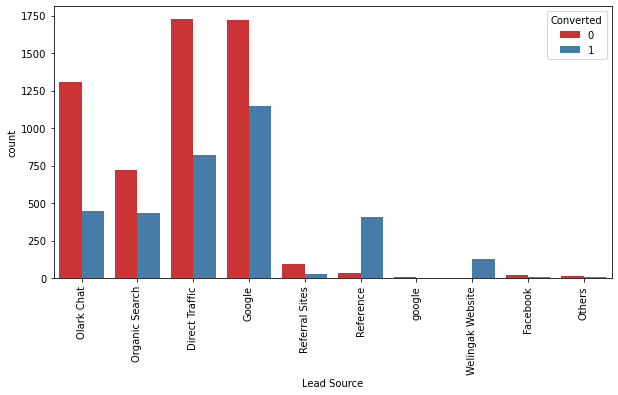

In [28]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

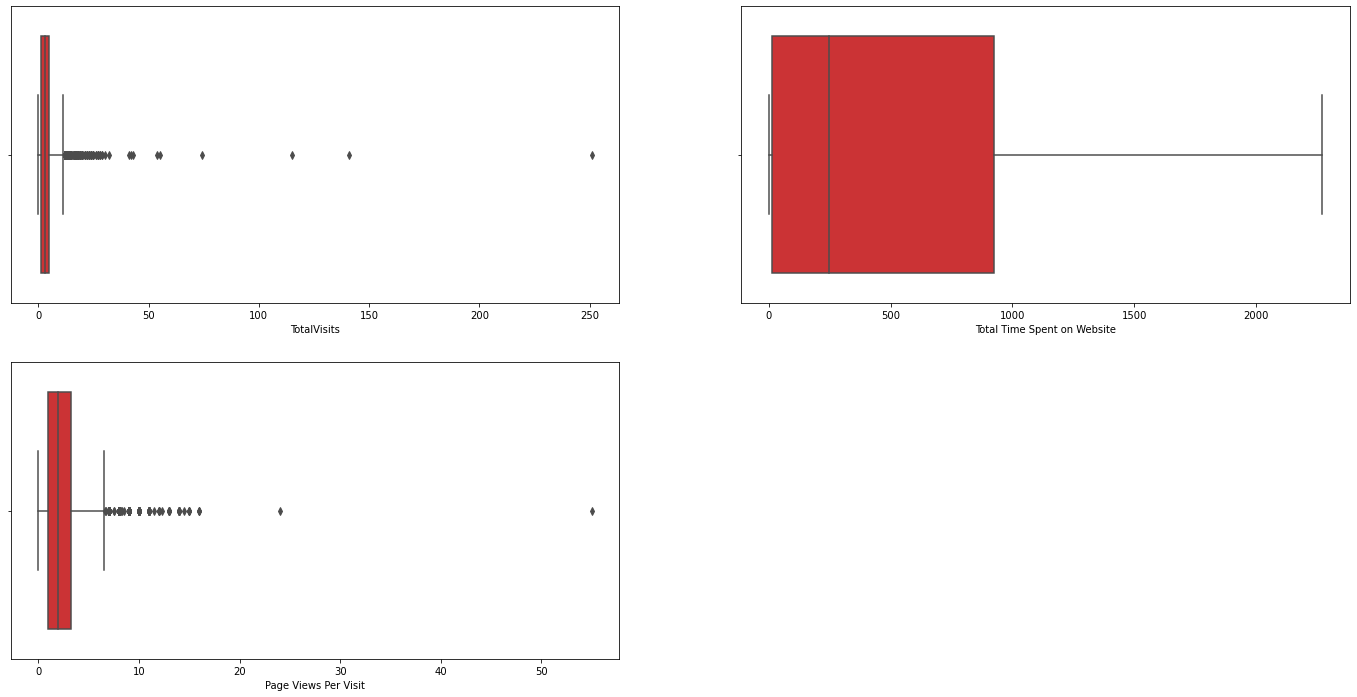

In [29]:
# Analysis for outliers
out_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(24,12))
for i in range(len(out_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(leads[out_cols[i]],orient='vert',palette='Set1')

#### Inference:
- Total Visits : As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.
- Website should be made more engaging to make leads spend more time.
- Page Views per visit : As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.
- Last Activity : Most of the lead have their Email opened as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 60%.
    
    

In [30]:
pr_cols = ['TotalVisits','Page Views Per Visit']
for i in pr_cols:
    percentiles = leads[i].quantile([0.05,0.95]).values
    leads[i][leads[i] <= percentiles[0]] = percentiles[0]
    leads[i][leads[i] >= percentiles[1]] = percentiles[1]

In [31]:
leads[pr_cols].describe()

,TotalVisits,Page Views Per Visit
count,9074.000000,9074.000000
mean,3.191867,2.265943
std,2.780618,1.790991
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.200000
max,10.000000,6.000000


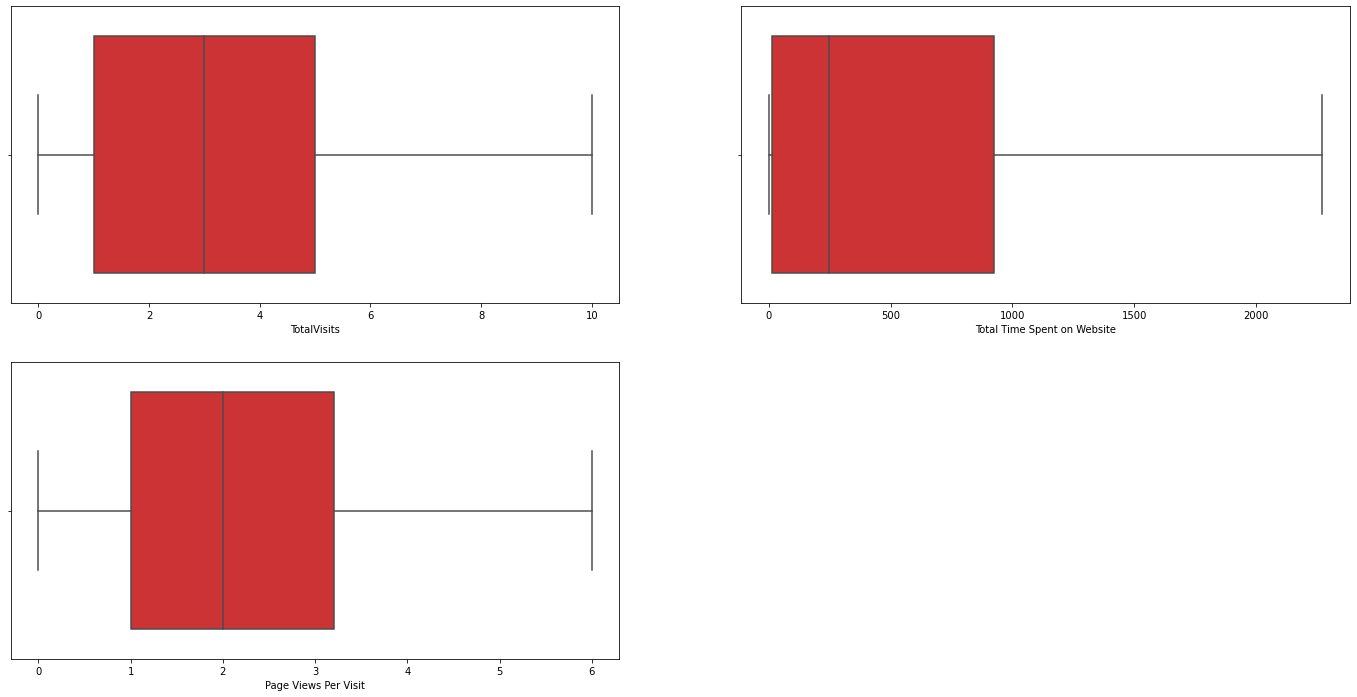

In [32]:
# Analysis for outliers
out_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(24,12))
for i in range(len(out_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(leads[out_cols[i]],orient='vert',palette='Set1')

Results
Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [33]:
cols_to_drop = ['Country','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                'Through Recommendations','Tags','A free copy of Mastering The Interview','What matters most to you in choosing a course', 'Search']
leads.drop(cols_to_drop,axis=1,inplace=True)

In [34]:
leads.shape

(9074, 14)

In [35]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

In [36]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9074 non-null   int64  
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

### Data Preparation

#### 1) Converting some binary variables (Yes/No) to 1/0

In [37]:
var_col =  ['Do Not Email', 'Do Not Call']
leads[var_col] = leads[var_col].apply(lambda x: x.map({'Yes':1,'No':0}))

### 2) Creating Dummy variables for the categorical features:

In [38]:
cat_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
            'City','Last Notable Activity']
dummy_data = pd.get_dummies(leads[cat_cols], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([leads, dummy_data], axis=1)
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [40]:
#Dropping the columns for which dummies were created
lead_data.drop(cat_cols, axis = 1,inplace=True)

### 3) Splitting the data into train and test set

In [41]:
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)
# Putting target variable to y
y = lead_data['Converted']


In [42]:
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [43]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 4) Scaling the features

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,630949,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,649355,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,579735,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,614238,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,588625,0,0,0.643547,2.017593,0.122613,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

In [47]:
lead_data.columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',

In [48]:
X_train.columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last

## Feature Selection Using RFE

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 45),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 61),
 ('Lead Source_Facebook', False, 52),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Others', False, 59),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', False, 6),
 ('Lead Source_google', False, 43),
 ('Last Activity_Converted to Lead', False, 2),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Marked Spam', False, 48),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Email Received', False, 46),
 ('Last Activity_Form Submitted on Website

In [51]:
col = X_train.columns[rfe.support_]


In [52]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Hea

### Assessing the model for stat models

In [53]:
def model_prediction(X_train,cols,y_train,cutoff):
    X_train_sm = sm.add_constant(X_train[col])
    logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()
    print(res.summary())
    y_train_pred = res.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)
    # create the dataframe
    y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred*100})
    y_train_pred_final['Lead Number'] = y_train.index
    # Apply the cutoff to derive the lead convertion
    y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > cutoff else 0)
    print('         ')
    # Let's check the overall accuracy.
    print('Accuracy Score is ',metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted)*100)
    return y_train_pred_final,res


In [54]:
# new column 'predicted' with 1 if Lead_Prob > 50 else 0
df,res = model_prediction(X_train,col,y_train,50)
df.head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.6
Date:                Sun, 19 Mar 2023   Deviance:                       5239.1
Time:                        22:57:34   Pearson chi2:                 6.41e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Lead,Lead_Prob,Lead Number,predicted
0,0,12.278063,3009,0
1,0,28.562416,1012,0
2,0,20.539726,9226,0
3,1,87.327234,4750,1
4,1,58.080746,7987,1


In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif(X_train,train_cols):
    vif = pd.DataFrame()
    vif['Features'] = X_train[train_cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[train_cols].values, i) for i in range(X_train[train_cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [56]:
#Checking VIFs
check_vif(X_train,col)

,Features,VIF
0,Lead Number,45.75
11,What is your current occupation_Unemployed,34.93
14,Last Notable Activity_SMS Sent,6.50
9,Last Activity_SMS Sent,6.26
4,Lead Origin_Landing Page Submission,4.82
5,Lead Origin_Lead Add Form,4.66
7,Lead Source_Reference,4.21
12,What is your current occupation_Working Profes...,3.96
10,Specialization_Finance Management,3.22
6,Lead Source_Olark Chat,2.68


In [57]:
# For the column "What is your current occupation_Unemployed"  VIF is very high, Hence needs to be dropped
col = col.drop("What is your current occupation_Unemployed")

In [58]:
# Rerun the model for new set of columns
df,res = model_prediction(X_train,col,y_train,50)
df.head()


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.6
Date:                Sun, 19 Mar 2023   Deviance:                       5249.2
Time:                        22:57:34   Pearson chi2:                 6.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Lead,Lead_Prob,Lead Number,predicted
0,0,12.559598,3009,0
1,0,28.608507,1012,0
2,0,20.761697,9226,0
3,1,87.429802,4750,1
4,1,58.428352,7987,1


In [59]:
# There is no difference in accuracy , calcuating VIFs again
check_vif(X_train,col)

,Features,VIF
0,Lead Number,10.75
13,Last Notable Activity_SMS Sent,6.50
9,Last Activity_SMS Sent,6.25
4,Lead Origin_Landing Page Submission,4.81
5,Lead Origin_Lead Add Form,4.66
7,Lead Source_Reference,4.21
10,Specialization_Finance Management,3.22
6,Lead Source_Olark Chat,2.68
12,Last Notable Activity_Modified,2.53
2,TotalVisits,1.69


In [60]:
# Dropping columns with high VIF 
col = col.drop('Last Notable Activity_SMS Sent')

In [61]:
# Rerun the model for new set of columns
df,res = model_prediction(X_train,col,y_train,50)
df.head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.5
Date:                Sun, 19 Mar 2023   Deviance:                       5271.0
Time:                        22:57:35   Pearson chi2:                 6.50e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Lead,Lead_Prob,Lead Number,predicted
0,0,13.392060,3009,0
1,0,30.451155,1012,0
2,0,29.290417,9226,0
3,1,86.205764,4750,1
4,1,68.987192,7987,1


In [62]:
# There is slight increase in accuracy , calcuating VIFs again
check_vif(X_train,col)

,Features,VIF
0,Lead Number,10.57
4,Lead Origin_Landing Page Submission,4.81
5,Lead Origin_Lead Add Form,4.66
7,Lead Source_Reference,4.21
10,Specialization_Finance Management,3.22
6,Lead Source_Olark Chat,2.68
12,Last Notable Activity_Modified,1.90
2,TotalVisits,1.68
9,Last Activity_SMS Sent,1.60
8,Last Activity_Olark Chat Conversation,1.58


VIFs are all below 5

In [63]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(df.Lead, df.predicted )
confusion

array([[3463,  442],
       [ 745, 1701]], dtype=int64)

In [64]:
# Let's check the overall accuracy.
metrics.accuracy_score(df.Lead, df.predicted)

0.8131002991654858

In [65]:
def scores(mat):
    TP = mat[1,1] # true positive 
    TN = mat[0,0] # true negatives
    FP = mat[0,1] # false positives
    FN = mat[1,0] # false negatives
    Accuracy = (TP+TN)/(TP+TN+FP+FN)
    print('Sensitivity/Recall = ',(TP / float(TP+FN))*100)
    print('Specificity = ',(TN / float(TN+FP))*100)
    print('False positive rate[FPR] = ',(FP/ float(TN+FP))*100)
    print('Precision/Positive predictive value = ',(TP / float(TP+FP))*100)
    print('Negative predictive value = ', (TN / float(TN+ FN))*100)
    print('Accuracy = ',Accuracy*100)

In [66]:
scores(confusion)

Sensitivity/Recall =  69.54210956663941
Specificity =  88.68117797695263
False positive rate[FPR] =  11.318822023047376
Precision/Positive predictive value =  79.37470835277648
Negative predictive value =  82.29562737642586
Accuracy =  81.31002991654857


### Step 9: Plotting the ROC Curve

In [67]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [68]:
fpr, tpr, thresholds = metrics.roc_curve(df.Lead, df.Lead_Prob, drop_intermediate = False )

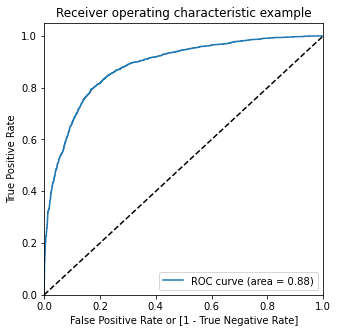

In [69]:
draw_roc(df.Lead, df.Lead_Prob)

### Step 10: Finding Optimal Cutoff Point

In [70]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)*10 for x in range(10)]
for i in numbers:
    df[i]= df.Lead_Prob.map(lambda x: 1 if x > i else 0)
df.head()

,Lead,Lead_Prob,Lead Number,predicted,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0
0,0,13.392060,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,30.451155,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,29.290417,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,86.205764,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,68.987192,7987,1,1,1,1,1,1,1,1,0,0,0


In [71]:
[float(num*10) for num in range(10)]

[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]

In [72]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float(n*10) for n in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(df.Lead, df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.0    0.0  0.385136  1.000000  0.000000
10.0  10.0  0.599591  0.968111  0.368758
20.0  20.0  0.732011  0.916190  0.616645
30.0  30.0  0.800819  0.845053  0.773111
40.0  40.0  0.817037  0.767375  0.848143
50.0  50.0  0.813100  0.695421  0.886812
60.0  60.0  0.798457  0.605478  0.919334
70.0  70.0  0.781609  0.515127  0.948528
80.0  80.0  0.759880  0.423140  0.970807
90.0  90.0  0.716265  0.281684  0.988476


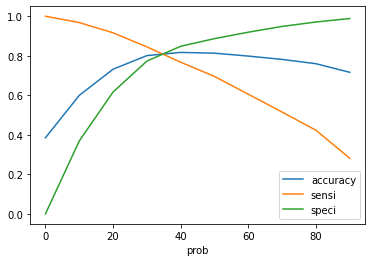

In [73]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Based on the ROC curve the cutoff is somewhere around 30-40 hence taking the cutoff as 35

In [74]:
df['final_predicted'] = df.Lead_Prob.map( lambda x: 1 if x > 35 else 0)

df.head()

,Lead,Lead_Prob,Lead Number,predicted,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,final_predicted
0,0,13.392060,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,30.451155,1012,0,1,1,1,1,0,0,0,0,0,0,0
2,0,29.290417,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,86.205764,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,68.987192,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [75]:
print('Conversion Rate - ',(sum(df['final_predicted'])/df.shape[0])*100)

Conversion Rate -  42.26106125019682


In [76]:
# Let's check the overall accuracy.
print('Accuracy score - ',metrics.accuracy_score(df.Lead, df.final_predicted))

Accuracy score -  0.8129428436466698


In [77]:
confusion2 = metrics.confusion_matrix(df.Lead, df.final_predicted )
scores(confusion2)

Sensitivity/Recall =  80.58053965658218
Specificity =  81.74135723431498
False positive rate[FPR] =  18.258642765685018
Precision/Positive predictive value =  73.43517138599105
Negative predictive value =  87.04663212435233
Accuracy =  81.29428436466698


In [78]:
from sklearn.metrics import precision_score, recall_score
print('Precision score ',precision_score(df.Lead, df.final_predicted)*100)
print('Recall score ',recall_score(df.Lead, df.final_predicted)*100)

Precision score  73.43517138599105
Recall score  80.58053965658218


### Precision and recall tradeoff

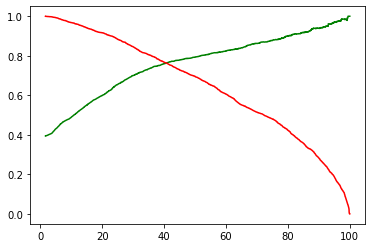

In [79]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(df.Lead, df.Lead_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [80]:
X_test.shape

(2723, 76)

In [81]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,628652,0,0,0.284772,-0.600595,0.955505,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,644500,0,0,0.643547,1.887326,1.510766,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,588935,0,0,-0.432779,-0.752879,-0.155018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,619437,0,0,-1.150329,-0.888650,-1.265540,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,623381,0,0,1.719873,-0.587751,2.066027,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df.columns

Index([           'Lead',       'Lead_Prob',     'Lead Number',
             'predicted',               0.0,              10.0,
                    20.0,              30.0,              40.0,
                    50.0,              60.0,              70.0,
                    80.0,              90.0, 'final_predicted'],
      dtype='object')

In [83]:
X_train.columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last

In [84]:
# Add constant
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting lead number to index
y_test_df['Lead Number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.157918
1,1,1490,0.980850
2,0,7936,0.092900
3,1,4216,0.751577
4,0,3830,0.169908


In [85]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})
y_pred_final['Lead_Prob'] = y_pred_final['Lead_Prob'].apply(lambda x: x*100)
# Rearranging the columns
y_pred_final = y_pred_final[['Lead Number','Converted','Lead_Prob']]
y_pred_final.head()

,Lead Number,Converted,Lead_Prob
0,3271,0,15.791796
1,1490,1,98.084991
2,7936,0,9.290047
3,4216,1,75.157681
4,3830,0,16.990768


In [86]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 35 else 0)
y_pred_final.head()

,Lead Number,Converted,Lead_Prob,final_predicted
0,3271,0,15.791796,0
1,1490,1,98.084991,1
2,7936,0,9.290047,0
3,4216,1,75.157681,1
4,3830,0,16.990768,0


In [87]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8082996694821888

In [88]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
scores(confusion_test)

Sensitivity/Recall =  79.06976744186046
Specificity =  81.83391003460207
False positive rate[FPR] =  18.166089965397923
Precision/Positive predictive value =  71.28532360984504
Negative predictive value =  87.26937269372694
Accuracy =  80.82996694821888


In [89]:
from sklearn.metrics import recall_score, precision_score
print('recal_score : ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))
print('precision_score : ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

recal_score :  0.7906976744186046
precision_score :  0.7128532360984503


In [90]:
# Conversion rate for the predicted data

print('Conversion rate ',(sum(y_pred_final.final_predicted)/y_pred_final.shape[0])*100)


Conversion rate  40.28644876973926


### Final Observation:
 Lets compare the Model Performance parameters oobtained for Train & Test data:
- Train Data: 
    - Accuracy : 81.29% 
    - Sensitivity : 80.58% 
    - Specificity : 81.74% 
    - Precision : 73.43% 
    - Recall : 80.58%
- Test Data: 
    - Accuracy : 80.82% 
    - Sensitivity : 79.06% 
    - Specificity : 81.83% 
    - Precision : 71.28% 
    - Recall : 79.06%

#### Observation
- There is around 1% difference on train and test data's performance metrics.Hence we can say that there is not overfitting of the training data.

- Sensitivity values are high which will predict the customers correctly who might get converted.

- Specificity values are high which will ensure that customers on the verge of conversion are not selected

- Depending on the business requirement, we can increase or decrease the probability threshold value which in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model.

- For the CEO's ball park number of 80% conversion rate can be achieved by changing the cutoff to 10%